# Derivation of the potential using simpy

In [1]:
%matplotlib widget

In [2]:
# Código en SymPy para calcular el curl (rotacional) de los dos ejemplos proporcionados
import sympy as sp

# Definición de símbolos
X1, X2 = sp.symbols('X1 X2')
x, y = sp.symbols('x y')
a, c, I1, I2, I3 = sp.symbols('a c I1 I2 I3')

# Primer ejemplo (original del usuario)
phi_p, phi_pp, s0, IL, IC, IR, sL, sC, sR = sp.symbols('phi_p phi_pp s0 IL IC IR sL sC sR')

F1_ejemplo1 = (phi_p / 2)*(IL - IC + sL - sC) + s0**2 * phi_pp * X1 * X2
F2_ejemplo1 = (phi_p / 6)*(IL + IC - 2*IR + sL + sC - 2*sR) + (s0**2 * phi_pp / 6)*(X1**2 - 3*X2**2)

curl_ejemplo1 = sp.simplify(sp.diff(F2_ejemplo1, X1)*6 - sp.diff(F1_ejemplo1, X2)*2)
print(sp.latex( sp.simplify(sp.diff(F1_ejemplo1*2, X2))))
print(sp.latex( sp.simplify(sp.diff(F2_ejemplo1*6, X1))))
# Segundo ejemplo (de la imagen subida por el usuario, modelo poblacional con potencial explícito)
F1_ejemplo2 = a*(I1 - I2)/2 + x*y - c*(x**2 + 3*y**2)*x
F2_ejemplo2 = a*(I1 + I2 - 2*I3)/6 + (x**2 - 3*y**2)/6 - c*(x**2 + 3*y**2)*y

curl_ejemplo2 = sp.simplify(sp.diff(F2_ejemplo2, x)/2 - sp.diff(F1_ejemplo2, y)/6)

# Mostrar resultados del curl para ambos ejemplos
curl_ejemplo1, curl_ejemplo2


2 X_{1} \phi_{pp} s_{0}^{2}
2 X_{1} \phi_{pp} s_{0}^{2}


(0, 0)

In [3]:
# Definir la función potencial dada en SymPy y calcular sus derivadas parciales
x, y = sp.symbols('x y')
a, c, I1, I2, I3 = sp.symbols('a c I1 I2 I3')

# Definir la función potencial ψ(x,y)
psi = -a*(I1 - I2)*x - a*(I1 + I2 - 2*I3)*y - (y*x**2 - y**3) + c*(x**4/2 + (9/2)*y**4 + 3*x**2*y**2)

# Calcular derivadas parciales
dpsi_dx = sp.diff(psi, x)
dpsi_dy = sp.diff(psi, y)

# Simplificar las derivadas
dpsi_dx_simplified = sp.simplify(dpsi_dx)
dpsi_dy_simplified = sp.simplify(dpsi_dy)
-dpsi_dx_simplified
print()
-dpsi_dy_simplified/6 

a*(I1 + I2 - 2*I3)/6 - c*y*(6*x**2 + 18.0*y**2)/6 + x**2/6 - y**2/2

In [4]:
F2_ejemplo2

a*(I1 + I2 - 2*I3)/6 - c*y*(x**2 + 3*y**2) + x**2/6 - y**2/2

In [5]:
# Ahora calculamos explícitamente el potencial usando SymPy, dado que has reescrito el campo con factores adecuados.
import sympy as sp

# Definimos variables simbólicas
X1, X2 = sp.symbols('X1 X2')
phi_p, phi_pp, s0, IL, IC, IR, sL, sC, sR, R = sp.symbols('phi_p phi_pp s0 IL IC IR sL sC sR, R')

# Campo ajustado como lo planteas en la corrección
F1_bar = (phi_p / 2)*(IL - IC + R*(sL - sC)) + s0**2 * phi_pp * X1 * X2
F2_bar = (phi_p / 6)*(IL + IC - 2*IR + R*(sL + sC - 2*sR)) + (s0**2 * phi_pp / 6)*(X1**2 - 3*X2**2)

# Definir ahora el campo ajustado multiplicando la segunda componente por 3, como lo mencionas explícitamente
F1 = -F1_bar
F2 = -3 * F2_bar

# Verificar nuevamente el curl para asegurar que el campo es irrotacional
curl = sp.simplify(sp.diff(F2, X1) - sp.diff(F1, X2))

# Calcular el potencial integrando respecto a X1 y luego respecto a X2
potencial = sp.integrate(F1, X1)  # Integramos respecto a X1
# Añadimos términos que dependen solo de X2 que no hayan sido considerados aún
potencial += sp.integrate(F2 - sp.diff(potencial, X2), X2)

# Simplificamos el resultado
potencial_simplificado = sp.simplify(potencial)

potencial_simplificado
# print(sp.latex(potencial_simplificado))

-X1**2*X2*phi_pp*s0**2/2 + X1*phi_p*(IC - IL + R*sC - R*sL)/2 + X2**3*phi_pp*s0**2/2 - X2*phi_p*(IC + IL - 2*IR + R*sC + R*sL - 2*R*sR)/2

In [6]:
dpsi_dx = sp.diff(potencial_simplificado, X1)
dpsi_dy = sp.diff(potencial_simplificado, X2)

# Simplificar las derivadas
dpsi_dx_simplified = sp.simplify(dpsi_dx)
dpsi_dy_simplified = sp.simplify(dpsi_dy)
dpsi_dy_simplified

-X1**2*phi_pp*s0**2/2 + 3*X2**2*phi_pp*s0**2/2 - phi_p*(IC + IL - 2*IR + R*sC + R*sL - 2*R*sR)/2

<>:42: SyntaxWarning: invalid escape sequence '\p'
<>:42: SyntaxWarning: invalid escape sequence '\p'
<>:46: SyntaxWarning: invalid escape sequence '\p'
<>:47: SyntaxWarning: invalid escape sequence '\p'
<>:42: SyntaxWarning: invalid escape sequence '\p'
<>:42: SyntaxWarning: invalid escape sequence '\p'
<>:46: SyntaxWarning: invalid escape sequence '\p'
<>:47: SyntaxWarning: invalid escape sequence '\p'
/var/folders/gk/r166p6nx2bb5zf2rlwww8fc00000gn/T/ipykernel_73504/3865134461.py:42: SyntaxWarning: invalid escape sequence '\p'
  caption = f"Chosen values: $\phi'={phi_p_val}, \phi''={phi_pp_val}, s_0={s0_val}, I_L={IL_val}, I_C={IC_val}, I_R={IR_val}, s_L={sL_val}, s_C={sC_val}, s_R={sR_val}, R = {R_val}$"
/var/folders/gk/r166p6nx2bb5zf2rlwww8fc00000gn/T/ipykernel_73504/3865134461.py:42: SyntaxWarning: invalid escape sequence '\p'
  caption = f"Chosen values: $\phi'={phi_p_val}, \phi''={phi_pp_val}, s_0={s0_val}, I_L={IL_val}, I_C={IC_val}, I_R={IR_val}, s_L={sL_val}, s_C={sC_val}, s_

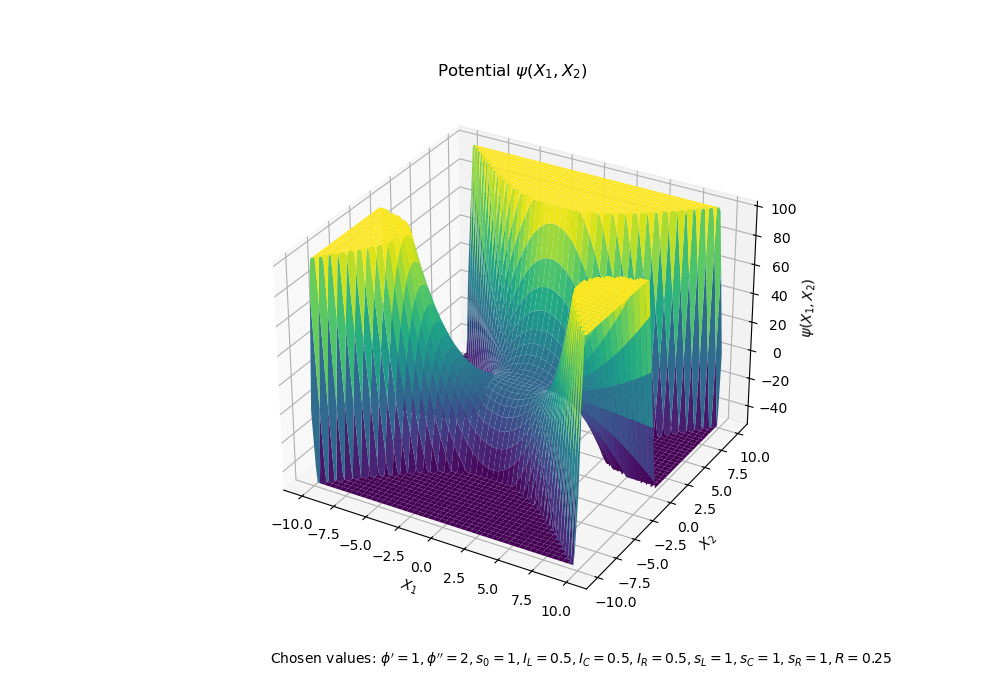

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definir valores arbitrarios para los parámetros
phi_p_val = 1
phi_pp_val = 2
s0_val = 1
IL_val, IC_val, IR_val = 100, 100, 100
sL_val, sC_val, sR_val = 1, 1, 1
R_val = 1
IL_val, IC_val, IR_val = 0.5, 0.5, 0.5
sL_val, sC_val, sR_val = 1, 1, 1
R_val = 1/4

# Convertir el potencial simbólico a función numérica
potencial_num = sp.lambdify((X1, X2), potencial_simplificado.subs({
    phi_p: phi_p_val,
    phi_pp: phi_pp_val,
    s0: s0_val,
    IL: IL_val,
    IC: IC_val,
    IR: IR_val,
    sL: sL_val,
    sC: sC_val,
    sR: sR_val,
    R: R_val
}))
# Add caption with the chosen values

# Crear malla de valores
x_vals = np.linspace(-10, 10, 200)
y_vals = np.linspace(-10, 10, 200)
X, Y = np.meshgrid(x_vals, y_vals)
Z = potencial_num(X, Y)
Z = np.clip(Z, -50, 100)  # Limitar el rango de Z para evitar problemas de visualización

# Gráfica 3D del potencial
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
caption = f"Chosen values: $\phi'={phi_p_val}, \phi''={phi_pp_val}, s_0={s0_val}, I_L={IL_val}, I_C={IC_val}, I_R={IR_val}, s_L={sL_val}, s_C={sC_val}, s_R={sR_val}, R = {R_val}$"
ax.text2D(0.05, -0.05, caption, transform=ax.transAxes, fontsize=10, verticalalignment='top')
ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
ax.set_zlabel('$\psi(X_1,X_2)$')
ax.set_title('Potential $\psi(X_1,X_2)$')
plt.savefig('potencial.png', dpi = 600)
plt.show()



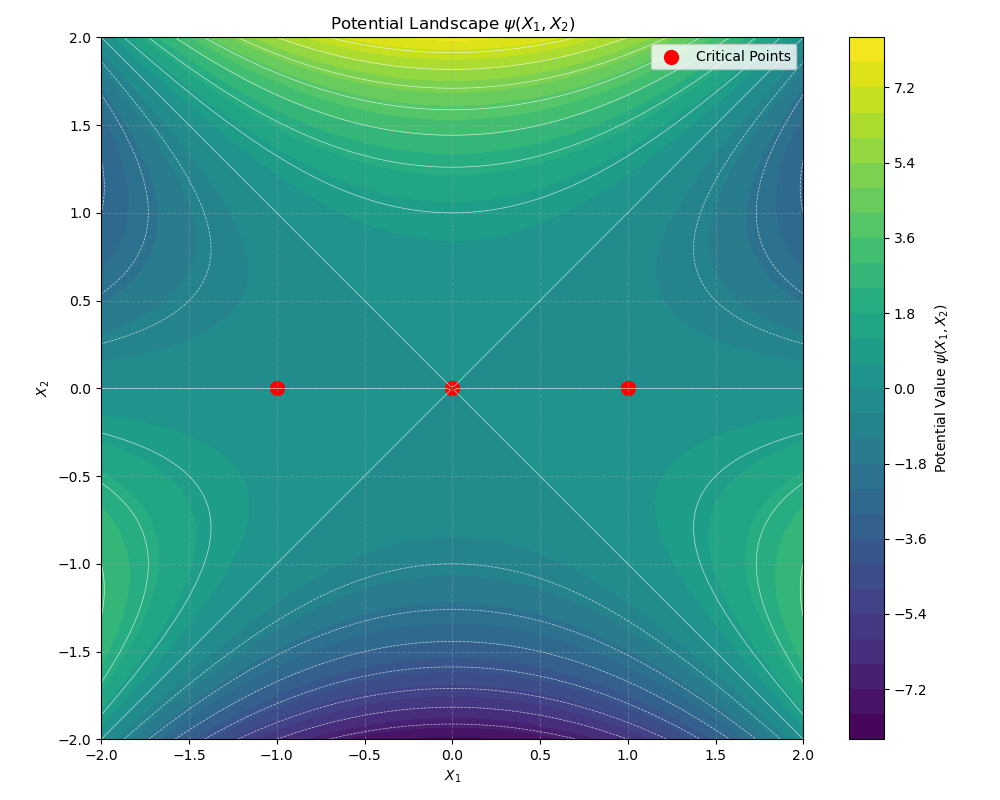

In [8]:
import numpy as np

import matplotlib.pyplot as plt

# Create a grid of values for X1 and X2
x_vals = np.linspace(-2, 2, 200)
y_vals = np.linspace(-2, 2, 200)
X, Y = np.meshgrid(x_vals, y_vals)

# Use the existing potential_num function from cell 12
Z = potencial_num(X, Y)

# Create a contour plot with filled contours
fig, ax = plt.subplots(figsize=(10, 8))

# Create a filled contour plot with 30 levels
contour = ax.contourf(X, Y, Z, 30, cmap='viridis')
# Add contour lines for better visualization
ax.contour(X, Y, Z, 15, colors='white', linewidths=0.5, alpha=0.7)

# Mark the critical points
critical_points = [(-1, 0), (0, 0), (1, 0)]
ax.scatter(*zip(*critical_points), color='red', s=100, marker='o', label='Critical Points')

# Add colorbar
cbar = plt.colorbar(contour)
cbar.set_label('Potential Value $\\psi(X_1, X_2)$')

# Add labels and title
ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
ax.set_title('Potential Landscape $\\psi(X_1, X_2)$')
ax.legend()

# Show grid
ax.grid(linestyle='--', alpha=0.3)

# Set equal aspect ratio
ax.set_aspect('equal')

plt.tight_layout()
plt.savefig('potential_landscape.png', dpi=300)
plt.show()

# Order $O(\varepsilon^3)$

In [2]:
import sympy as sp

# Definimos las variables simbólicas
X1, X2 = sp.symbols('X1 X2')
tau, phi_p, phi_pp, phi_ppp, s0, c,g, phi_Ip = sp.symbols('tau phi_p phi_pp phi_ppp s0 c g phi_Ip')
I_L, I_C, I_R, s_L, s_C, s_R, R = sp.symbols('I_L I_C I_R s_L s_C s_R R')
x = sp.symbols('x', real=True)
R_I, I0, I_I = sp.symbols('R_I I0 I_I', real=True)
# Definimos los componentes del campo vectorial (parte determinista, sin ruido)
F1 = -(
    (phi_p/2)*(I_L - I_C + X1*(s_L+s_C) + (R+X2)*(s_L-s_C)) +
    (s0*phi_pp/2)*(
         R*(s_L+s_C) + I_L + I_C + (2*(s0-c*g*phi_Ip))/(3*c*g*phi_Ip)*(I_L+I_C+I_R + R*(s_L+s_C+s_R))
    )*X1 +
    (s0*phi_pp/2)*(R*(s_L-s_C) + I_L - I_C)*X2 +
    s0**2 * phi_pp * X1*X2 +
    ((s0-c*g*phi_Ip)/(3*c*g*phi_Ip))* s0**3 * (phi_pp**2) * X1*(X1**2+3*X2**2) +
    (phi_ppp*s0**3/6)* X1*(X1**2+3*X2**2)
)

F2 = -3*(
    (phi_p/6)*(X1*(s_L-s_C) + X2*(s_L+s_C+4*s_R) + I_L + I_C - 2*I_R + R*(s_L+s_C-2*s_R)) +
    (s0*phi_pp/6)*(
         R*(s_L+s_C+4*s_R) + (I_L+I_C+4*I_R) + ((s0-c*g*phi_Ip)/(2*c*g*phi_Ip))*(I_L+I_C+I_R + R*(s_L+s_C+s_R))
    )*X2 +
    (s0*phi_pp/6)*(R*(s_L-s_C) + I_L - I_C)*X1 +
    (s0**2 * phi_pp/6)*(X1**2-3*X2**2) +
    ((s0-c*g*phi_Ip)/(3*c*g*phi_Ip))* s0**3 * (phi_pp**2) * X2*(X1**2+3*X2**2) +
    (phi_ppp*s0**3/6)* X2*(X1**2+3*X2**2)
)


curl = sp.simplify(sp.diff(F2, X1) - sp.diff(F1, X2))
print("Curl del campo:", curl)

U = sp.integrate(F1, X1)
U += sp.integrate(F2 - sp.diff(U, X2), X2)


# Simplificamos el potencial obtenido
U_simpl = sp.simplify(U)

# Mostramos el potencial (forma simbólica y en LaTeX)
print("Potencial U:")
print("\nForma LaTeX:")
print(sp.latex(U_simpl))
U_simpl


Curl del campo: 0
Potencial U:

Forma LaTeX:
\frac{X_{1}^{4} s_{0}^{3} \left(2 c g \phi_{Ip} \phi_{pp}^{2} - c g \phi_{Ip} \phi_{ppp} - 2 \phi_{pp}^{2} s_{0}\right) + 2 X_{1}^{2} \left(- I_{C} c g \phi_{Ip} \phi_{pp} s_{0} - 2 I_{C} \phi_{pp} s_{0}^{2} - I_{L} c g \phi_{Ip} \phi_{pp} s_{0} - 2 I_{L} \phi_{pp} s_{0}^{2} + 2 I_{R} c g \phi_{Ip} \phi_{pp} s_{0} - 2 I_{R} \phi_{pp} s_{0}^{2} - R c g \phi_{Ip} \phi_{pp} s_{0} s_{C} - R c g \phi_{Ip} \phi_{pp} s_{0} s_{L} + 2 R c g \phi_{Ip} \phi_{pp} s_{0} s_{R} - 2 R \phi_{pp} s_{0}^{2} s_{C} - 2 R \phi_{pp} s_{0}^{2} s_{L} - 2 R \phi_{pp} s_{0}^{2} s_{R} + 6 X_{2}^{2} c g \phi_{Ip} \phi_{pp}^{2} s_{0}^{3} - 3 X_{2}^{2} c g \phi_{Ip} \phi_{ppp} s_{0}^{3} - 6 X_{2}^{2} \phi_{pp}^{2} s_{0}^{4} - 6 X_{2} c g \phi_{Ip} \phi_{pp} s_{0}^{2} - 3 c g \phi_{Ip} \phi_{p} s_{C} - 3 c g \phi_{Ip} \phi_{p} s_{L}\right) + 9 X_{2}^{4} s_{0}^{3} \left(2 c g \phi_{Ip} \phi_{pp}^{2} - c g \phi_{Ip} \phi_{ppp} - 2 \phi_{pp}^{2} s_{0}\right) - 3 X_{2}^{2} \le

(X1**4*s0**3*(2*c*g*phi_Ip*phi_pp**2 - c*g*phi_Ip*phi_ppp - 2*phi_pp**2*s0) + 2*X1**2*(-I_C*c*g*phi_Ip*phi_pp*s0 - 2*I_C*phi_pp*s0**2 - I_L*c*g*phi_Ip*phi_pp*s0 - 2*I_L*phi_pp*s0**2 + 2*I_R*c*g*phi_Ip*phi_pp*s0 - 2*I_R*phi_pp*s0**2 - R*c*g*phi_Ip*phi_pp*s0*s_C - R*c*g*phi_Ip*phi_pp*s0*s_L + 2*R*c*g*phi_Ip*phi_pp*s0*s_R - 2*R*phi_pp*s0**2*s_C - 2*R*phi_pp*s0**2*s_L - 2*R*phi_pp*s0**2*s_R + 6*X2**2*c*g*phi_Ip*phi_pp**2*s0**3 - 3*X2**2*c*g*phi_Ip*phi_ppp*s0**3 - 6*X2**2*phi_pp**2*s0**4 - 6*X2*c*g*phi_Ip*phi_pp*s0**2 - 3*c*g*phi_Ip*phi_p*s_C - 3*c*g*phi_Ip*phi_p*s_L) + 9*X2**4*s0**3*(2*c*g*phi_Ip*phi_pp**2 - c*g*phi_Ip*phi_ppp - 2*phi_pp**2*s0) - 3*X2**2*(I_C*c*g*phi_Ip*phi_pp*s0 + I_C*phi_pp*s0**2 + I_L*c*g*phi_Ip*phi_pp*s0 + I_L*phi_pp*s0**2 + 7*I_R*c*g*phi_Ip*phi_pp*s0 + I_R*phi_pp*s0**2 + R*c*g*phi_Ip*phi_pp*s0*s_C + R*c*g*phi_Ip*phi_pp*s0*s_L + 7*R*c*g*phi_Ip*phi_pp*s0*s_R + R*phi_pp*s0**2*s_C + R*phi_pp*s0**2*s_L + R*phi_pp*s0**2*s_R + 2*c*g*phi_Ip*phi_p*s_C + 2*c*g*phi_Ip*phi_p*s_L 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import fsolve
import sympy as sp


phi = sp.Piecewise(
    (0, x < 0),
    (x**2, sp.And(x >= 0, x <= 1)),
    (2*sp.sqrt(x) - sp.Rational(3, 4), x > 1)
)

phi_prime = sp.diff(phi, x)
phi_double_prime = sp.diff(phi_prime, x)
phi_triple_prime = sp.diff(phi_double_prime, x)



In [6]:

s0_val = 1
IL_val, IC_val, IR_val = 1,1,1
sL_val, sC_val, sR_val = 0,0,0
c_val = 1        
g_val = 1  
I_I_val = 1/3

X0 = s0*R - c*R_I + I0
X0_I = g*R+I_I


phi_X0 = sp.simplify(phi.subs(x, X0))
phi_prime_X0 = sp.simplify(phi_prime.subs(x, X0))
phi_double_prime_X0 = sp.simplify(phi_double_prime.subs(x, X0))
phi_triple_prime_X0 = sp.simplify(phi_triple_prime.subs(x, X0))

phi_X0 = sp.simplify(phi.subs(x, X0))
phi_prime_X0 = sp.simplify(phi_prime.subs(x, X0))
phi_I_prime = sp.simplify(phi_prime.subs(x, X0_I))
phi_I = sp.simplify(phi.subs(x, X0_I))

eq1 = s0*phi_prime_X0-1
eq2 = R - phi_X0 
eq3 = R_I - phi_I
eq1 = eq1.subs({s0:s0_val, c:c_val, g:g_val, I_I:I_I_val})
eq2 = eq2.subs({s0:s0_val, c:c_val, g:g_val, I_I:I_I_val})
eq3 = eq3.subs({s0:s0_val, c:c_val, g:g_val, I_I:I_I_val})
F_so = sp.lambdify(
    (R, R_I, I0),
    (eq1, eq2, eq3),
    'numpy'
)

def fun(vars):
    R_val, R_I_val, I0_val = vars
    return F_so(R_val, R_I_val, I0_val)

x0 = [1/4, 1/4, 1/2]
R_val, R_I_val, I0_val = fsolve(fun, x0)

print("Valores de R, R_I, I0:")
print(f"R = {R_val}, R_I = {R_I_val}, I0 = {I0_val}")

# Definición de X₀ (aunque en el potencial no se reemplace directamente, se utiliza para interpretar φ, etc.)
phi_p_val = sp.N(phi_prime_X0.subs({s0: s0_val, R: R_val, R_I: R_I_val,I0: I0_val, c: c_val}))
phi_pp_val = sp.N(phi_double_prime_X0.subs({s0: s0_val, R: R_val, R_I: R_I_val, I0: I0_val, c: c_val}))
phi_ppp_val = sp.N(phi_triple_prime_X0.subs({s0: s0_val, R: R_val, R_I: R_I_val, I0: I0_val, c: c_val}))
phi_Ip_val = sp.N(phi_I_prime.subs({s0: s0_val, R: R_val, R_I: R_I_val, I0: I0_val, c: c_val, g: g_val, I_I: I_I_val}))

# Diccionario de sustitución: reemplazamos φ, φ', φ''' por sus versiones evaluadas en X₀ (phi1, phi2, phi3)
subs_dict = {
    sp.symbols('phi_p'): phi_p_val, 
    sp.symbols('phi_pp'): phi_pp_val,
    sp.symbols('phi_ppp'): phi_ppp_val,
    sp.symbols('phi_Ip'): phi_Ip_val,
    sp.symbols('s0'): s0_val,
    sp.symbols('I0'): I0_val,
    sp.symbols('c'): c_val,
    sp.symbols('g'): g_val,
    sp.symbols('R'): R_val,
    sp.symbols('I_L'): IL_val,
    sp.symbols('I_C'): IC_val,
    sp.symbols('I_R'): IR_val,
    sp.symbols('s_L'): sL_val,
    sp.symbols('s_C'): sC_val,
    sp.symbols('s_R'): sR_val,
    sp.symbols('R_I'): R_I_val,
}

# Sustituir en la expresión del potencial y forzar la evaluación numérica
pot_expr_num = sp.N(U_simpl.subs(subs_dict))

# Crear la función numérica a partir de la expresión evaluada
potencial_num = sp.lambdify((sp.symbols('X1'), sp.symbols('X2')), pot_expr_num, 'numpy')
print("F1",F1.subs(subs_dict))
print("F2",F2.subs(subs_dict))
print("U",pot_expr_num)


Valores de R, R_I, I0:
R = 0.25, R_I = 0.34027777777777735, I0 = 0.5902777777777773
F1 -2.0*X1*X2 + 0.19047619047619*X1*(X1**2 + 3*X2**2) - 1.71428571428571*X1
F2 -1.0*X1**2 + 3.0*X2**2 + 0.571428571428571*X2*(X1**2 + 3*X2**2) - 5.78571428571429*X2
U 0.0476190476190476*X1**4 + 0.0714285714285714*X1**2*(4.0*X2**2 - 14.0*X2 - 12.0) + 0.428571428571428*X2**4 + 1.0*X2**3 - 2.89285714285714*X2**2


In [5]:
import pickle
exprs = {'F1': -F1, 'F2': -1/3*F2}
phis = {'phi':phi, 'phi_X0':phi_X0, 'phi_X0_p': phi_prime_X0, 'phi_X0_pp': phi_double_prime_X0, 'phi_X0_ppp': phi_triple_prime_X0, 'phi_I':phi_I ,'phi_Ip': phi_I_prime}
with open('exprs.pkl', 'wb') as f:
    pickle.dump(exprs, f)

with open('U_simpl.pkl', 'wb') as f:
    pickle.dump(U_simpl, f)

with open('phis.pkl', 'wb') as f:
    pickle.dump(phis, f)

In [13]:

def phi_p_fun(I0, R, s0, c, R_I):
    return ((0) if (I0 + R*s0 - R_I*c < 0) else (2*I0 + 2*R*s0 - 2*R_I*c) if (I0 + R*s0 - R_I*c <= 1) else (1/math.sqrt(I0 + R*s0 - R_I*c)))
    
def phi_pp_fun(I0, R, s0, c, R_I):
    return ((0) if (I0 + R*s0 - R_I*c < 0) else (2) if (I0 + R*s0 - R_I*c <= 1) else (-(1/2)/(I0 + R*s0 - R_I*c)**(3/2)))
def phi_ppp_fun(I0, R, s0, c, R_I):
    return ((0) if (I0 + R*s0 - R_I*c <= 1) else ((3/4)/(I0 + R*s0 - R_I*c)**(5/2)))

def U(X1, X2, phi_p, phi_pp, phi_ppp, phi_Ip, s0, I0, c, g, R, I_L, I_C, I_R, s_L, s_C, s_R, R_I):
    phi_p = phi_p_fun(I0, R, s0, c, R_I)
    phi_pp = phi_pp_fun(I0, R, s0, c, R_I)
    phi_ppp = phi_ppp_fun(I0, R, s0, c, R_I)
    return (1/24)*(X1**4*s0**3*(-2*c*g*phi_Ip*phi_pp**2 + c*g*phi_Ip*phi_ppp + 2*phi_pp**2*s0) + 2*X1**2*(I_C*c*g*phi_Ip*phi_pp*s0 + 2*I_C*phi_pp*s0**2 + I_L*c*g*phi_Ip*phi_pp*s0 + 2*I_L*phi_pp*s0**2 - 2*I_R*c*g*phi_Ip*phi_pp*s0 + 2*I_R*phi_pp*s0**2 + R*c*g*phi_Ip*phi_pp*s0*s_C + R*c*g*phi_Ip*phi_pp*s0*s_L - 2*R*c*g*phi_Ip*phi_pp*s0*s_R + 2*R*phi_pp*s0**2*s_C + 2*R*phi_pp*s0**2*s_L + 2*R*phi_pp*s0**2*s_R - 6*X2**2*c*g*phi_Ip*phi_pp**2*s0**3 + 3*X2**2*c*g*phi_Ip*phi_ppp*s0**3 + 6*X2**2*phi_pp**2*s0**4 + 6*X2*c*g*phi_Ip*phi_pp*s0**2 + 3*c*g*phi_Ip*phi_p*s_C + 3*c*g*phi_Ip*phi_p*s_L) + 9*X2**4*s0**3*(-2*c*g*phi_Ip*phi_pp**2 + c*g*phi_Ip*phi_ppp + 2*phi_pp**2*s0) + 3*X2**2*(I_C*c*g*phi_Ip*phi_pp*s0 + I_C*phi_pp*s0**2 + I_L*c*g*phi_Ip*phi_pp*s0 + I_L*phi_pp*s0**2 + 7*I_R*c*g*phi_Ip*phi_pp*s0 + I_R*phi_pp*s0**2 + R*c*g*phi_Ip*phi_pp*s0*s_C + R*c*g*phi_Ip*phi_pp*s0*s_L + 7*R*c*g*phi_Ip*phi_pp*s0*s_R + R*phi_pp*s0**2*s_C + R*phi_pp*s0**2*s_L + R*phi_pp*s0**2*s_R + 2*c*g*phi_Ip*phi_p*s_C + 2*c*g*phi_Ip*phi_p*s_L + 8*c*g*phi_Ip*phi_p*s_R) + 12*c*g*phi_Ip*(-X1*(I_C*X2*phi_pp*s0 + I_C*phi_p - I_L*X2*phi_pp*s0 - I_L*phi_p + R*X2*phi_pp*s0*s_C - R*X2*phi_pp*s0*s_L + R*phi_p*s_C - R*phi_p*s_L + X2*phi_p*s_C - X2*phi_p*s_L) - X2**3*phi_pp*s0**2 + X2*phi_p*(I_C + I_L - 2*I_R + R*s_C + R*s_L - 2*R*s_R)))/(c*g*phi_Ip)

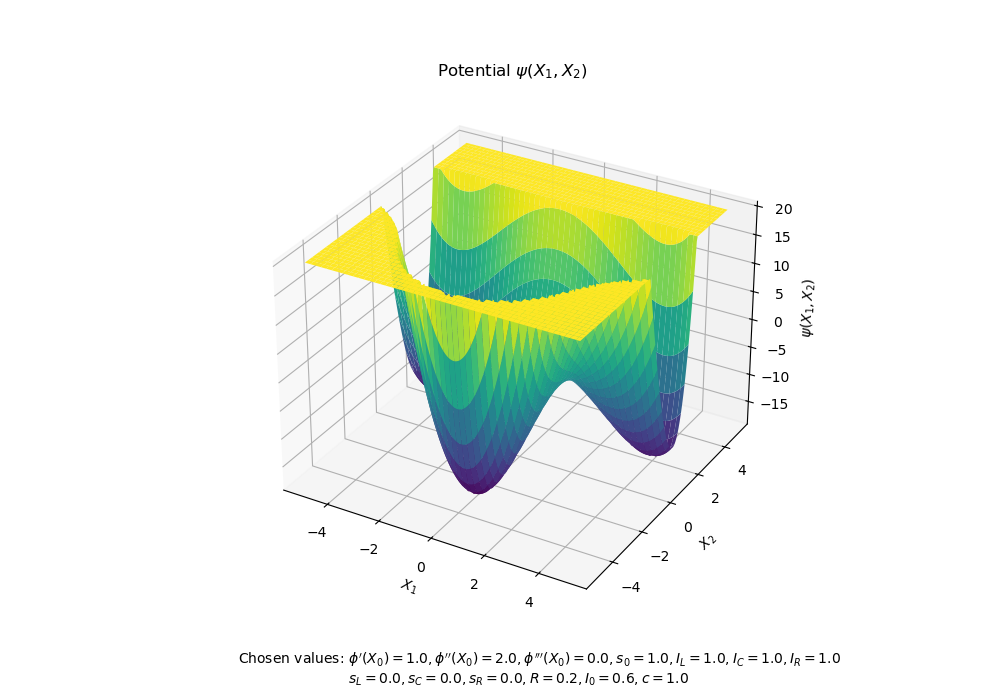

In [14]:

# Crear malla de valores para X1 y X2
x_vals = np.linspace(-5,5, 200)
y_vals = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x_vals, y_vals)
Z = potencial_num(X, Y)
low_threshold = -40.0
high_threshold = 20

# O usando percentiles para capturar la mayor parte de la variabilidad:
# low_threshold = np.percentile(Z, 5)
# high_threshold = np.percentile(Z, 95)

# Aplicar el recorte a Z
Z = np.clip(Z, low_threshold, high_threshold)
# Gráfica 3D del potencial
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis')

# Añadir leyenda (caption) con los valores elegidos
caption = (
    f"Chosen values: $\\phi'(X_0)={phi_p_val:.1f}, \\phi''(X_0)={phi_pp_val:.1f}, "
    f"\\phi'''(X_0)={phi_ppp_val:.1f}, s_0={s0_val:.1f}, I_L={IL_val:.1f}, I_C={IC_val:.1f}, "
    f"I_R={IR_val:.1f}, s_L={sL_val:.1f}, s_C={sC_val:.1f}, s_R={sR_val:.1f}, R={R_val:.1f}, I_0={I0_val:.1f}, c={c_val:.1f}$"
)
ax.text2D(-0.01, -0.05, 
          f"Chosen values: $\\phi'(X_0)={phi_p_val:.1f}, \\phi''(X_0)={phi_pp_val:.1f}, \\phi'''(X_0)={phi_ppp_val:.1f}, s_0={s0_val:.1f}, I_L={IL_val:.1f}, I_C={IC_val:.1f}, I_R={IR_val:.1f}$\n"
          f"                         $s_L={sL_val:.1f}, s_C={sC_val:.1f}, s_R={sR_val:.1f}, R={R_val:.1f}, I_0={I0_val:.1f}, c={c_val:.1f}$",
          transform=ax.transAxes, fontsize=10, verticalalignment='top')

# Etiquetas y título
ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
ax.set_zlabel('$\\psi(X_1,X_2)$')
ax.set_title('Potential $\\psi(X_1,X_2)$')

# Guardar la figura y mostrarla
plt.savefig('potencial.png', dpi=600)
plt.show()

In [15]:
from scipy.optimize import fsolve
import pandas as pd
# ------------------------------------------
# Cálculo del gradiente (derivadas parciales)
# ------------------------------------------
F1 = sp.diff(U_simpl, X1)  # dU/dX1
F2 = sp.diff(U_simpl, X2)  # dU/dX2

# Sustituir los parámetros en las derivadas
F1_num_expr = sp.N(F1.subs(subs_dict))
F2_num_expr = sp.N(F2.subs(subs_dict))

# Convertir el gradiente en una función numérica
grad_func = sp.lambdify((X1, X2), [F1_num_expr, F2_num_expr], 'numpy')

# ------------------------------------------
# Resolver numéricamente grad_U = 0 usando fsolve
# ------------------------------------------
def grad_wrapper(x):
    return np.array(grad_func(x[0], x[1])).astype(float)

# Elegimos varios puntos iniciales (se esperan tres wells)
x_guess = np.linspace(-5, 5, 10)
y_guess = np.linspace(-5, 5, 10)
initial_guesses = np.array(np.meshgrid(x_guess, y_guess)).T.reshape(-1, 2)

critical_points_fsolve = []
for guess in initial_guesses:
    sol = fsolve(grad_wrapper, guess)
    sol_rounded = np.round(sol, decimals=6)  # redondeamos para evitar duplicados
    if not any(np.allclose(sol_rounded, cp) for cp in critical_points_fsolve):
        critical_points_fsolve.append(sol_rounded)

print("Critical points found with fsolve:")
for cp in critical_points_fsolve:
    print(cp)
print("Done with fsolve.")


Hessian = sp.hessian(U_simpl, (X1, X2))

print("\nHessian and classification of critical points (using sympy.solve results):")
for cp in critical_points_fsolve:
# Sustituir el punto crítico y los parámetros en la Hessiana
    H_cp = Hessian.subs({X1: cp[0], X2: cp[1]}).subs(subs_dict)
    eigenvals = H_cp.eigenvals()
    U_val = U_simpl.subs({X1: cp[0], X2: cp[1]}).subs(subs_dict)
    print("Critical point:", cp)
    print("Potential value:", U_val)
    print("Eigenvalues of Hessian:")
    sp.pprint(eigenvals)
    # Se considera mínimo si todos los autovalores son positivos
    is_min = all(val > 0 for val in eigenvals.keys())
    print("Is minimum:", is_min)
    print("-"*40)
# Create a dataframe with critical points and their classification

# Lists to store the classifications
point_coords = []
potential_vals = []
eigenvalue1 = []
eigenvalue2 = []
point_types = []

# Process each critical point
for cp in critical_points_fsolve:
    # Calculate Hessian eigenvalues at this point
    H_cp = Hessian.subs({X1: cp[0], X2: cp[1]}).subs(subs_dict)
    eigenvals_dict = H_cp.eigenvals()
    eigenvals_list = list(eigenvals_dict.keys())
    
    # Store potential value
    U_val = float(U_simpl.subs({X1: cp[0], X2: cp[1]}).subs(subs_dict))
    
    # Classify the critical point based on eigenvalues
    if all(val > 0 for val in eigenvals_list):
        point_type = "Minimum"
    elif all(val < 0 for val in eigenvals_list):
        point_type = "Maximum"
    else:
        point_type = "Saddle Point"
    
    # Append to lists
    point_coords.append(f"({cp[0]:.4f}, {cp[1]:.4f})")
    potential_vals.append(U_val)
    eigenvalue1.append(float(eigenvals_list[0]))
    if len(eigenvals_list) > 1:
        # If there are two eigenvalues, append the second one
        eigenvalue2.append(float(eigenvals_list[1]))
    else:
        # If only one eigenvalue, append None or 0
        eigenvalue2.append(float(eigenvals_list[0]))
    point_types.append(point_type)

# Create dataframe
critical_points = pd.DataFrame({
    'Critical Point': point_coords,
    'Potential Value': potential_vals,
    'Eigenvalue 1': eigenvalue1,
    'Eigenvalue 2': eigenvalue2,
    'Type': point_types
})

display(critical_points)

# # ------------------------------------------
# # Resolver simbólicamente para comparar (opcional)
# # ------------------------------------------
grad_U = [sp.diff(pot_expr_num, X1), sp.diff(pot_expr_num, X2)]
critical_points_sym = sp.solve(grad_U, (X1, X2), dict=True)
print("\nCritical points found with sympy.solve:")
sp.pprint(critical_points_sym)
print()

# # ------------------------------------------
# # Cálculo de la matriz Hessiana y clasificación de los puntos críticos
# # ------------------------------------------
# Hessian = sp.hessian(U_simpl, (X1, X2))

# print("\nHessian and classification of critical points (using sympy.solve results):")
# for cp in critical_points_sym:
#     # Sustituir el punto crítico y los parámetros en la Hessiana
#     H_cp = Hessian.subs(cp).subs(subs_dict)
#     eigenvals = H_cp.eigenvals()
#     U_val = U_simpl.subs(cp).subs(subs_dict)
#     print("Critical point:", cp)
#     print("Potential value:", U_val)
#     print("Eigenvalues of Hessian:")
#     sp.pprint(eigenvals)
#     # Se considera mínimo si todos los autovalores son positivos
#     is_min = all(val > 0 for val in eigenvals.keys())
#     print("Is minimum:", is_min)
#     print("-"*40)


# Filter the saddle points from the dataframe
saddle_points = critical_points[critical_points['Type'] == 'Saddle Point']

print("Saddle Points:")
display(saddle_points)

Critical points found with fsolve:
[-0.       -2.909853]
[-1.658718 -0.518344]
[-4.232248  1.446915]
[0.       1.159853]
[4.232248 1.446915]
[-0.  0.]
[ 1.658718 -0.518344]
Done with fsolve.

Hessian and classification of critical points (using sympy.solve results):
Critical point: [-0.       -2.909853]
Potential value: -18.4068672449103
Eigenvalues of Hessian:
{8.94384570377656: 1, 20.3009964768463: 1}
Is minimum: True
----------------------------------------
Critical point: [-1.658718 -0.518344]
Potential value: -1.24605678965478
Eigenvalues of Hessian:
{-7.98805864431764: 1, 3.09439454740793: 1}
Is minimum: False
----------------------------------------
Critical point: [-4.232248  1.446915]
Potential value: -16.4266837351230
Eigenvalues of Hessian:
{6.69863921351401: 1, 24.0230073232048: 1}
Is minimum: True
----------------------------------------
Critical point: [0.       1.159853]
Potential value: -1.55574436223003
Eigenvalues of Hessian:
{-3.26527229622343: 1, 8.09187847684628: 1

,Critical Point,Potential Value,Eigenvalue 1,Eigenvalue 2,Type
0,"(-0.0000, -2.9099)",-18.406867,8.943846,20.300996,Minimum
1,"(-1.6587, -0.5183)",-1.246057,3.094395,-7.988059,Saddle Point
2,"(-4.2322, 1.4469)",-16.426684,6.698639,24.023007,Minimum
3,"(0.0000, 1.1599)",-1.555744,-3.265272,8.091878,Saddle Point
4,"(4.2322, 1.4469)",-16.426684,6.698639,24.023007,Minimum
5,"(-0.0000, 0.0000)",0.000000,-1.714286,-5.785714,Maximum
6,"(1.6587, -0.5183)",-1.246057,3.094395,-7.988059,Saddle Point



Critical points found with sympy.solve:
[{X₁: -4.23224754611768, X₂: 1.4469154637284}, {X₁: -1.65871818417215, X₂: -0. ↪

↪ 518344035156972}, {X₁: 0.0, X₂: -2.90985257451246}, {X₁: 0.0, X₂: 0.0}, {X₁: ↪

↪  0.0, X₂: 1.15985257451246}, {X₁: 1.65871818417215, X₂: -0.518344035156972}, ↪

↪  {X₁: 4.23224754611768, X₂: 1.4469154637284}]

Saddle Points:


,Critical Point,Potential Value,Eigenvalue 1,Eigenvalue 2,Type
1,"(-1.6587, -0.5183)",-1.246057,3.094395,-7.988059,Saddle Point
3,"(0.0000, 1.1599)",-1.555744,-3.265272,8.091878,Saddle Point
6,"(1.6587, -0.5183)",-1.246057,3.094395,-7.988059,Saddle Point


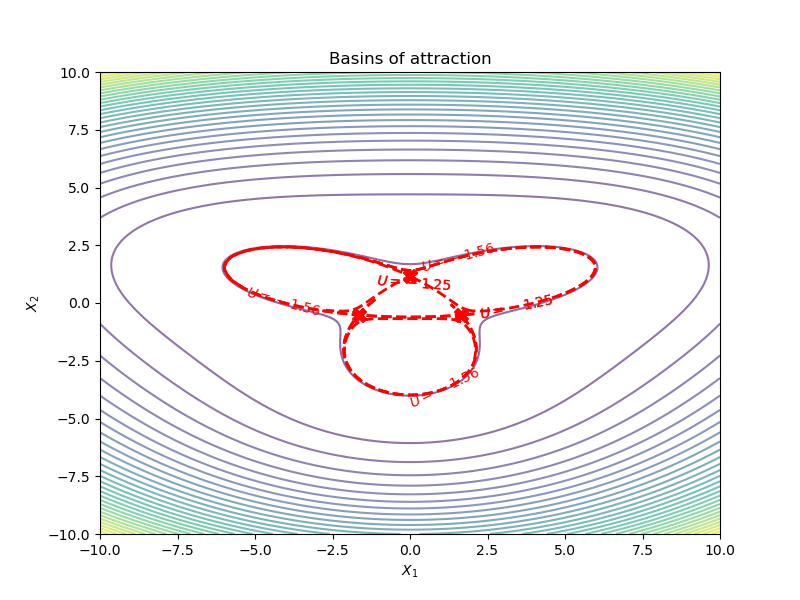

In [16]:
U_num = sp.lambdify((X1, X2), U_simpl.subs(subs_dict), 'numpy')

# 2) Recoger coordenadas y niveles de los saddles
saddle_vals = []
for _, row in saddle_points.iterrows():
    # parsear la columna '(x, y)'
    xs, ys = map(float, row['Critical Point'].strip('()').split(','))
    E_s  = U_num(xs, ys)
    saddle_vals.append((xs, ys, E_s))

# 3) Definir la región de trazado (ajusta margin según convenga)
xs_vals = [sv[0] for sv in saddle_vals]
ys_vals = [sv[1] for sv in saddle_vals]

x_min, x_max = [-10,10]
y_min, y_max = [-10,10]
# rejilla
x_lin = np.linspace(x_min, x_max, 400)
y_lin = np.linspace(y_min, y_max, 400)
Xg, Yg = np.meshgrid(x_lin, y_lin)
Ug      = U_num(Xg, Yg)

# 4) Dibujar contornos + curvas críticas
plt.figure(figsize=(8,6))
# contornos generales del potencial
plt.contour(Xg, Yg, Ug, levels=30, cmap='viridis', alpha=0.6)

# para cada saddle, trazar su curva de nivel U=E_s
for xs, ys, E_s in saddle_vals:
    cs = plt.contour(
        Xg, Yg, Ug,
        levels=[E_s],
        colors='red',
        linewidths=2
    )
    plt.clabel(cs, fmt={E_s:f'$U={E_s:.2f}$'})
    plt.scatter(xs, ys, marker='X', color='red', s=100, zorder=5)

plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.title('Basins of attraction')
plt.show()

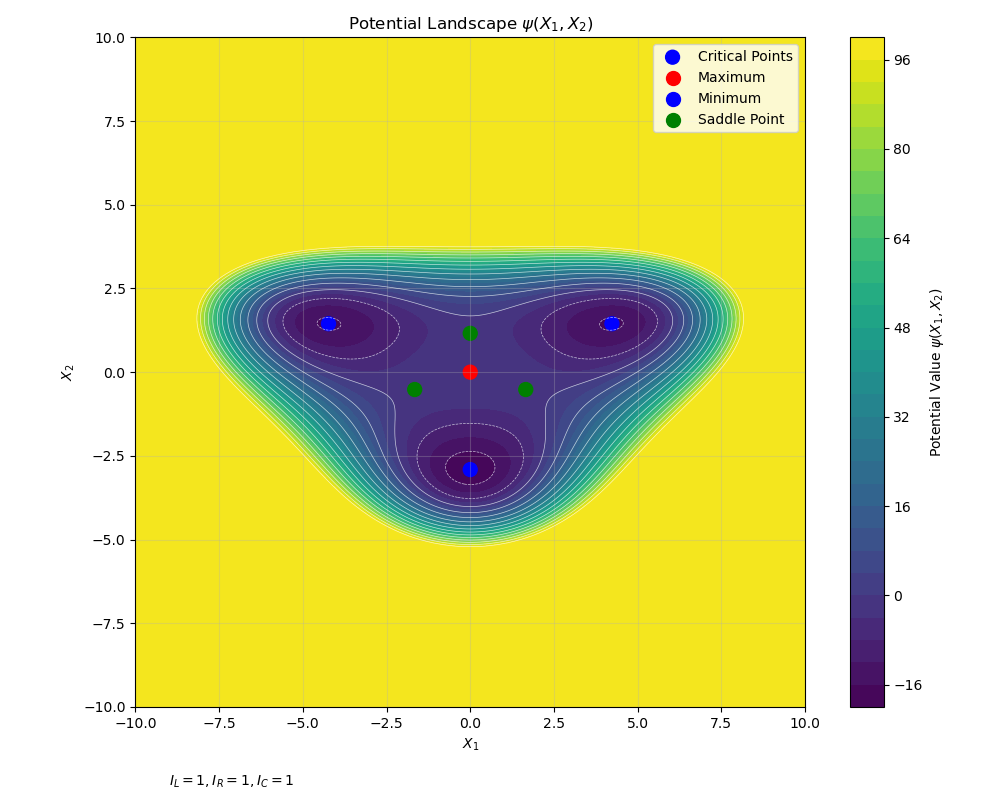

In [17]:
import numpy as np
from matplotlib.colors import SymLogNorm
import matplotlib.pyplot as plt

# Create a grid of values for X1 and X2
x_vals = np.linspace(-10, 10, 400)
y_vals = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x_vals, y_vals)

# Use the existing potential_num function from cell 12
Z = potencial_num(X, Y)

Z = np.clip(Z, -50, 100)  # Limitar el rango de Z para evitar problemas de visualización
# Create a contour plot with filled contours

fig, ax = plt.subplots(figsize=(10, 8))


# Create a filled contour plot with 30 levels
contour = ax.contourf(X, Y, Z, 30, cmap='viridis')
# Add contour lines for better visualization
ax.contour(X, Y, Z, 15, colors='white', linewidths=0.5, alpha=0.7)

# Mark the critical points
# Extract x and y coordinates and types from critical_points DataFrame
x_coords = []
y_coords = []
point_types = []

for i, row in critical_points.iterrows():
	# Extract coordinates from strings like "(0.0000, -3.5822)"
	coord_str = row['Critical Point']
	coords = coord_str.strip('()').split(',')
	x_coords.append(float(coords[0]))
	y_coords.append(float(coords[1]))
	point_types.append(row['Type'])

# Create a colormap for different types
colors = {'Maximum': 'red', 'Minimum': 'blue', 'Saddle Point': 'green'}
point_colors = [colors[t] for t in point_types]

# Plot the critical points
ax.scatter(x_coords, y_coords, c=point_colors, s=100, marker='o', label='Critical Points')

# Add a legend for point types
for point_type, color in colors.items():
	ax.scatter([], [], c=color, label=point_type, s=100, marker='o')

# Add colorbar
cbar = plt.colorbar(contour)
cbar.set_label('Potential Value $\\psi(X_1, X_2)$')

# Add labels and title
ax.set_xlabel('$X_1$')
text_IL_IR_IC = f"$I_L={IL_val}, I_R={IR_val}, I_C={IC_val}$"
ax.text(0.05, -0.1, text_IL_IR_IC, transform=ax.transAxes, fontsize=10, verticalalignment='top')
ax.set_ylabel('$X_2$')
ax.set_title('Potential Landscape $\\psi(X_1, X_2)$')
ax.legend()

# Show grid
ax.grid(linestyle='-', alpha=0.3)

# Set equal aspect ratio
ax.set_aspect('equal')

plt.tight_layout()
plt.savefig('potential_landscape.png', dpi=600)
plt.show()